In [79]:
import tensorflow as tf
import ssl
import numpy as np
import matplotlib.pyplot as plt
ssl._create_default_https_context = ssl._create_unverified_context

In [47]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [52]:
print(train_data[0])
print(train_labels[0])
print(len(train_data))
print(max(max(train_data)))
print(min(train_data[0]))
a = sorted(train_data[0])
print(a)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
25000
9995
1
[1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,

In [49]:
word_index = tf.keras.datasets.imdb.get_word_index()
print(type(word_index))
print(type(word_index.items()))
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decode_review)

<class 'dict'>
<class 'dict_items'>
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised f

In [50]:
def vectorize_sequences(sequences, dimension=10000):
    """
    one hot vector
    sequences是包含所有评论的序列，每个评论（单词？）对应一个长度为10000的数组，矩阵的行数为评论数量，列对应于长度：10000
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [120]:
print(x_train[0])
print(x_train.shape)
print(x_train)
print(x_train[0][5535])

[0. 1. 1. ... 0. 0. 0.]
(25000, 10000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
1.0


In [59]:
y_train = np.asarray((train_labels).astype('float32'))
y_test = test_labels.astype(np.float32)
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [92]:
model = tf.keras.models.Sequential()
# Dense一维全连接
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [93]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
x_val = x_train[:10000]     # data for valid
partial_x_train = x_train[10000:]     # data for train

y_val = y_train[:10000]    # labels for valid
partial_y_train = y_train[10000:]    # labels for train

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.5332 - accuracy: 0.7711 - val_loss: 0.4007 - val_accuracy: 0.8565
Epoch 2/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.3101 - accuracy: 0.8977 - val_loss: 0.3386 - val_accuracy: 0.8601
Epoch 3/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.2184 - accuracy: 0.9285 - val_loss: 0.2822 - val_accuracy: 0.8854
Epoch 4/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.1714 - accuracy: 0.9427 - val_loss: 0.2766 - val_accuracy: 0.8890
Epoch 5/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.1380 - accuracy: 0.9558 - val_loss: 0.2836 - val_accuracy: 0.8886
Epoch 6/20
15000/15000 [==============================] - 1s 77us/sample - loss: 0.1158 - accuracy: 0.9634 - val_loss: 0.2970 - val_accuracy: 0.8855
Epoch 7/20
15000/15000 [==============================]

In [95]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


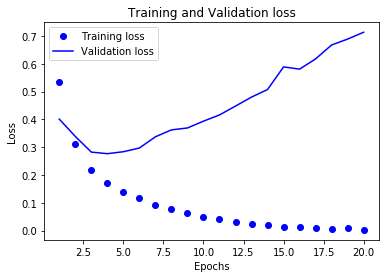

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [139]:
model.predict(x_test).shape
print(type(x_test))
print(x_test[0].shape)
a = x_test[0].reshape(1, 10000)
print(a.shape)

print(x_test[0])
print(a)
model.predict_classes(a)

<class 'numpy.ndarray'>
(10000,)
(1, 10000)
[0. 1. 1. ... 0. 0. 0.]
[[0. 1. 1. ... 0. 0. 0.]]


array([[0]], dtype=int32)